# Assignment 1

### Part I 

In Brightspace, you will find a collection of textart I s. Use NLTK respectively spacy for the following analyses. 

1. Perform sentence splitting and word tokenization. Report the statistics of word frequency (per story and in total) in a python dictionary, plot the 25 most common words (per story and in total) in the form of a histogram. 

2. Perform stemming on the text using the Porter and Lancaster stemmer. Re-create the statistics and the plot from 1. Compare the differences between the stemmed and unstemmed results, and discuss the difference in the results of the two stemmers.

3. In Brightspace, you will find three translations of Tom Sawyer by Mark Twain. After cleaning the document (e.g. removing the preamble, TOC, licensing information …), use the appropriate spacy models to derive the POS-tags of the text. Report the frequencies of the tags for the three languages. What assumptions do you make based on the findings?

Results
1.Provide your discussion as a short report in brightspace.
2.Provide the code as a jupyter notebook. Make sure your code runs (after necessary libraries are installed). That includes using relative file paths to read the data. Deliver your code via GitHub add FPannach

### Import packages

In [8]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/natalie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/natalie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem import SnowballStemmer, PorterStemmer, LancasterStemmer

In [11]:
from nltk.stem import WordNetLemmatizer

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize

### Loading text files and cleaning text

In [296]:
import os
import string 

# defining path files
part_i_1_2_path = 'Part_I_1-2'
part_i_3_path = 'Part_I_3'

# loading the files
texts_1_2 = {}
for filename in os.listdir(part_i_1_2_path):
    if filename.endswith('.txt'):
        with open(os.path.join(part_i_1_2_path, filename), 'r', encoding='utf-8') as file:
            # reading files
            text = file.read()
            # removing punct and making it lowercase
            translation_table = str.maketrans('', '', string.punctuation + "“”’")  
            text = text.translate(translation_table).lower()
            # storing the clean text
            texts_1_2[filename] = text

texts_3 = {} 
for filename in os.listdir(part_i_3_path): 
    if filename.endswith('.txt'): 
        with open(os.path.join(part_i_3_path, filename), 'r', encoding='utf-8') as file:
            text = file.read() 
            texts_3[filename] = text
            

### Tokenize Words

In [270]:
tokenized_texts_1_2 = {}
for filename, text in texts_1_2.items():
    words = word_tokenize(text)
    tokenized_texts_1_2[filename] = {'words': words}

### Calculate word frequency statistics

In [272]:
from nltk import FreqDist

word_frequencies_1_2 = {}
total_word_frequencies = FreqDist()

for filename, tokens in tokenized_texts_1_2.items():
    freq_dist = FreqDist(tokens['words'])
    word_frequencies_1_2[filename] = freq_dist
    total_word_frequencies.update(tokens['words'])

In [274]:
word_frequencies_1_2

{'01.txt': FreqDist({'the': 17, 'her': 12, 'missy': 10, 'a': 10, 'and': 9, 'river': 9, 'to': 8, 'was': 7, 'on': 7, 'maps': 5, ...}),
 '02.txt': FreqDist({'she': 60, 'her': 21, 'the': 20, 'him': 16, 'and': 14, 'to': 13, 'in': 12, 'was': 12, 'a': 11, 'as': 11, ...}),
 '03.txt': FreqDist({'the': 80, 'her': 59, 'to': 55, 'and': 47, 'he': 47, 'you': 42, 'i': 32, 'of': 32, 'his': 30, 'it': 29, ...}),
 '04.txt': FreqDist({'the': 79, 'to': 50, 'he': 39, 'was': 30, 'doctor': 26, 'her': 23, 'she': 22, 'that': 22, 'and': 22, 'rose': 21, ...}),
 '05.txt': FreqDist({'you': 238, 'the': 133, 'your': 122, 'to': 112, 'and': 84, 'she': 82, 'her': 80, 'a': 78, 'of': 52, 'in': 45, ...})}

In [330]:
total_word_frequencies

FreqDist({'the': 329, 'you': 284, 'to': 238, 'she': 198, 'her': 195, 'and': 176, 'a': 140, 'he': 125, 'your': 122, 'was': 111, ...})

### Plot histogram

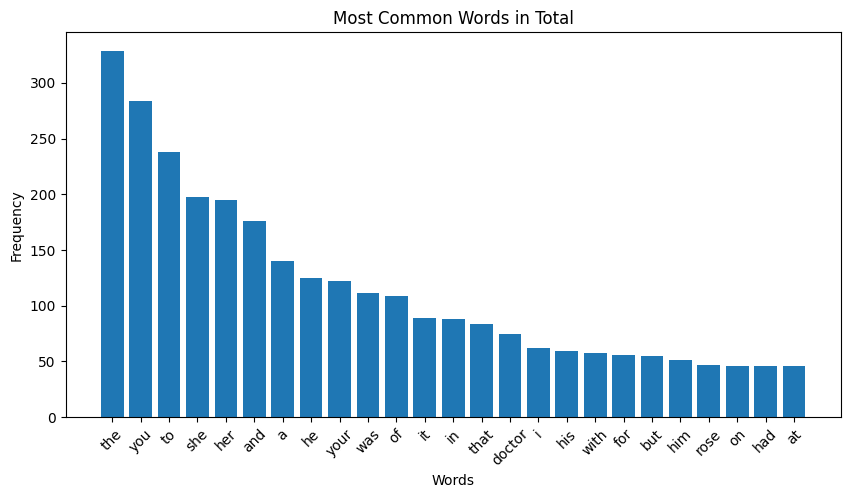

In [276]:
import matplotlib.pyplot as plt

def plot_word_frequencies(freq_dist, title):
    most_common = freq_dist.most_common(25) 
    words, counts = zip(*most_common) 

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# plot for total word frequencies
plot_word_frequencies(total_word_frequencies, 'Most Common Words in Total')

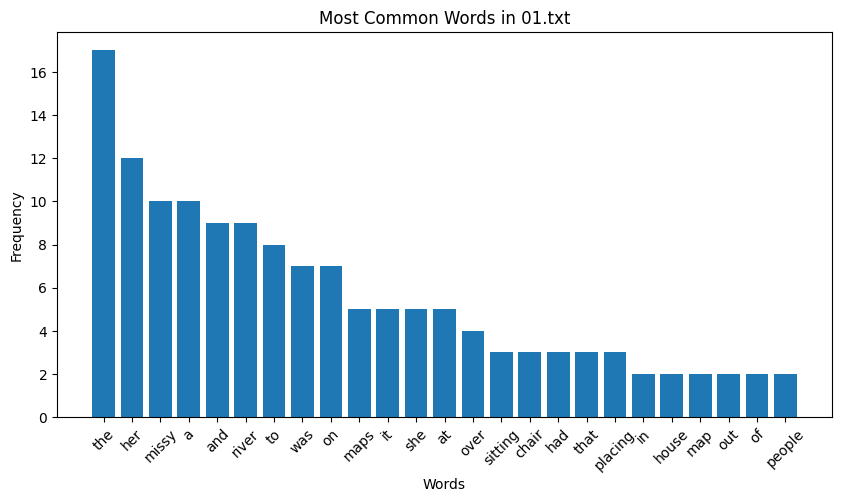

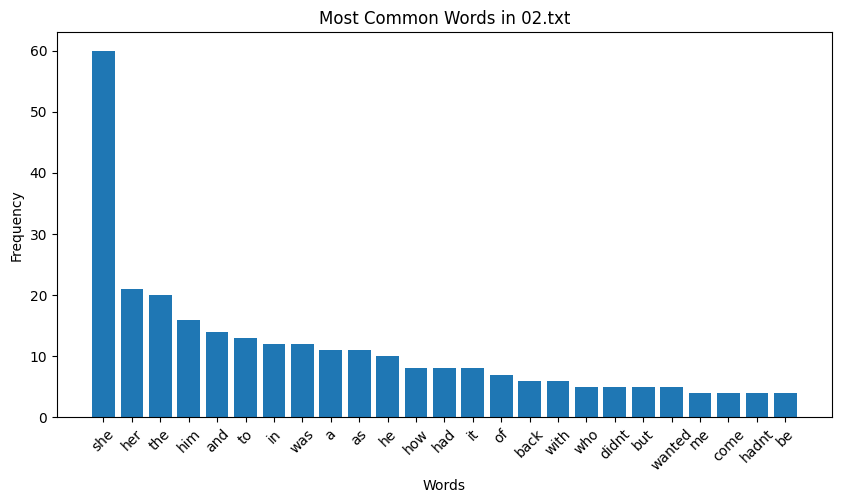

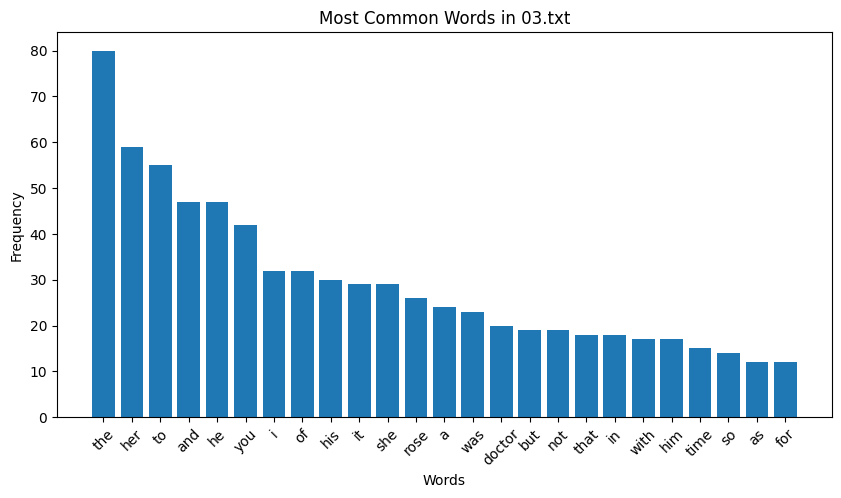

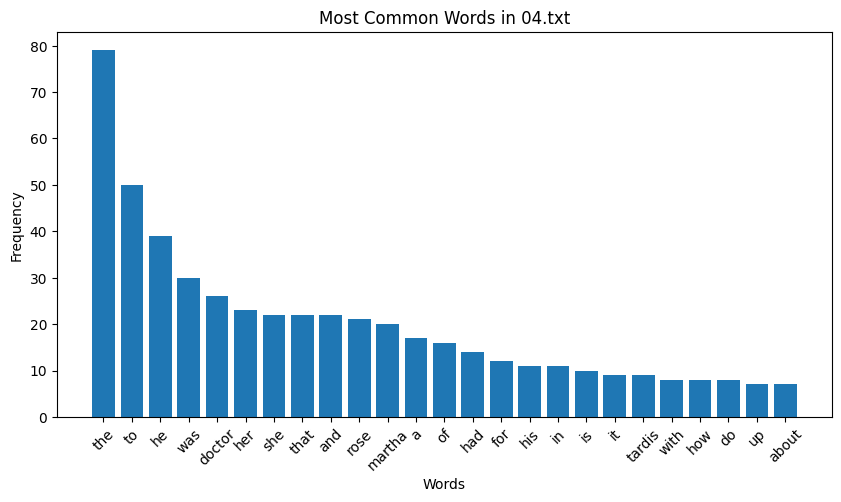

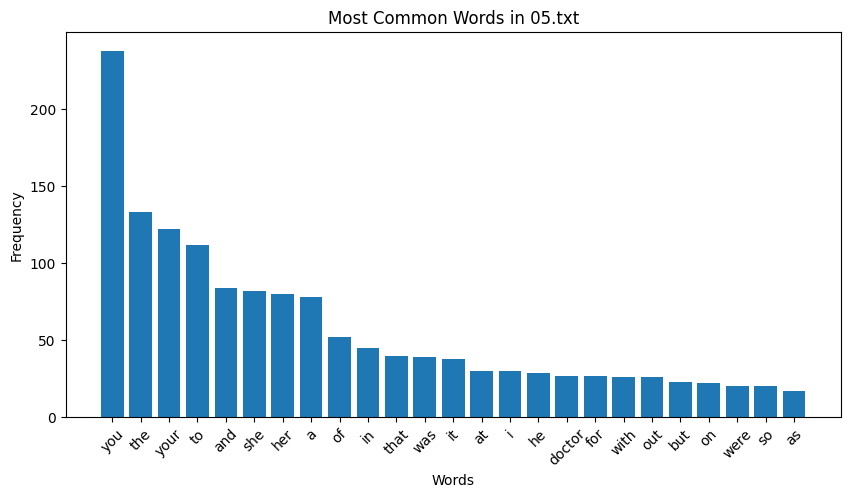

In [328]:
# looping through each text in the dictionary and plot
for filename, freq_dist in word_frequencies_1_2.items():
    plot_word_frequencies(freq_dist, f'Most Common Words in {filename}')

## Part I, Question 2
### Porter Stemmer

In [202]:
#initialise the stemmer
p_stemmer = PorterStemmer()

### Tokenize words

In [209]:
p_stemmed_texts_1_2 = {}

for filename, text in texts_1_2.items():
    # tokenize text into words
    words = word_tokenize(text)  
    # stem each word
    p_stemmed_words = [p_stemmer.stem(word) for word in words]
    # storing the stemmed words back in the dictionary
    p_stemmed_texts_1_2[filename] = p_stemmed_words


In [312]:
p_stemmed_texts_1_2

{'01.txt': ['anoth',
  'plot',
  'bonesbard',
  'missi',
  'wa',
  'sit',
  'on',
  'a',
  'chair',
  'in',
  'a',
  'hous',
  'map',
  'and',
  'paper',
  'spread',
  'around',
  'normal',
  'her',
  'plan',
  'wa',
  'mental',
  'but',
  'river',
  'had',
  'suggest',
  'a',
  'physic',
  'map',
  'to',
  'refer',
  'to',
  'and',
  'it',
  'wa',
  'help',
  'river',
  'walk',
  'out',
  'of',
  'the',
  'bedroom',
  'the',
  'peopl',
  'who',
  'own',
  'thi',
  'hous',
  'realli',
  'have',
  'no',
  'good',
  'cloth',
  'she',
  'wa',
  'wear',
  'a',
  'tshirt',
  'that',
  'drench',
  'her',
  'form',
  'and',
  'some',
  'trouser',
  'that',
  'look',
  'about',
  'the',
  'right',
  'size',
  'missi',
  'smile',
  'still',
  'in',
  'her',
  'mari',
  'poppin',
  'look',
  'outfit',
  'river',
  'look',
  'over',
  'at',
  'the',
  'map',
  'darl',
  'wouldnt',
  'it',
  'be',
  'better',
  'to',
  'start',
  'there',
  'she',
  'point',
  'at',
  'a',
  'place',
  'on',
  'th

### Calculate word frequency statistics

In [214]:
p_stemmed_word_frequencies_1_2 = {}
p_stemmed_total_word_frequencies = FreqDist()

for filename, tokens in p_stemmed_texts_1_2.items():
    freq_dist = FreqDist(tokens)
    p_stemmed_word_frequencies_1_2[filename] = freq_dist
    p_stemmed_total_word_frequencies.update(tokens)

In [145]:
p_stemmed_word_frequencies_1_2

{'01.txt': FreqDist({'the': 17, 'her': 12, 'river': 11, 'missi': 10, 'a': 10, 'and': 9, 'to': 8, 'wa': 7, 'on': 7, 'map': 7, ...}),
 '02.txt': FreqDist({'she': 60, 'her': 21, 'the': 20, 'him': 16, 'and': 14, 'to': 13, 'in': 12, 'wa': 12, 'a': 11, 'as': 11, ...}),
 '03.txt': FreqDist({'the': 80, 'her': 60, 'to': 55, 'and': 47, 'he': 47, 'you': 42, 'i': 32, 'of': 32, 'it': 32, 'hi': 30, ...}),
 '04.txt': FreqDist({'the': 79, 'to': 50, 'he': 41, 'wa': 30, 'doctor': 30, 'she': 25, 'her': 24, 'rose': 22, 'that': 22, 'and': 22, ...}),
 '05.txt': FreqDist({'you': 238, 'the': 133, 'your': 128, 'to': 112, 'and': 84, 'she': 82, 'her': 81, 'a': 78, 'of': 52, 'it': 51, ...})}

In [332]:
p_stemmed_total_word_frequencies

FreqDist({'the': 329, 'you': 284, 'to': 238, 'she': 201, 'her': 198, 'and': 176, 'a': 140, 'your': 132, 'he': 128, 'wa': 111, ...})

### Plot histogram

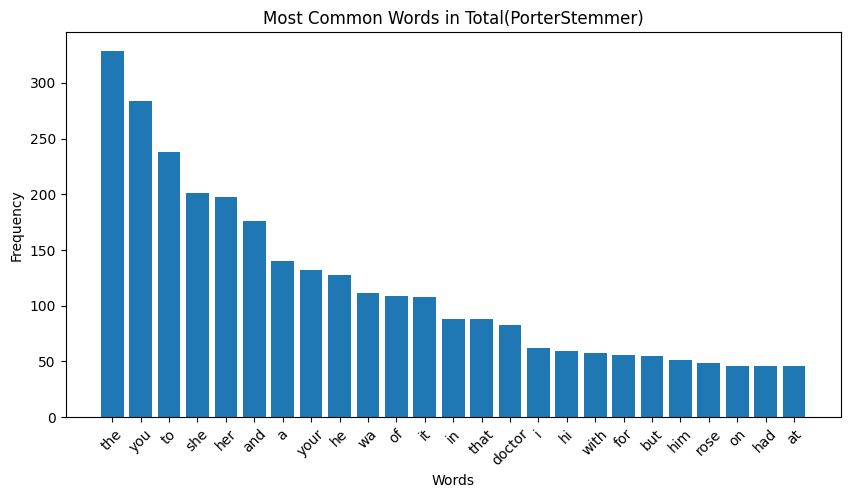

In [219]:
plot_word_frequencies(p_stemmed_total_word_frequencies, 'Most Common Words in Total(PorterStemmer)')

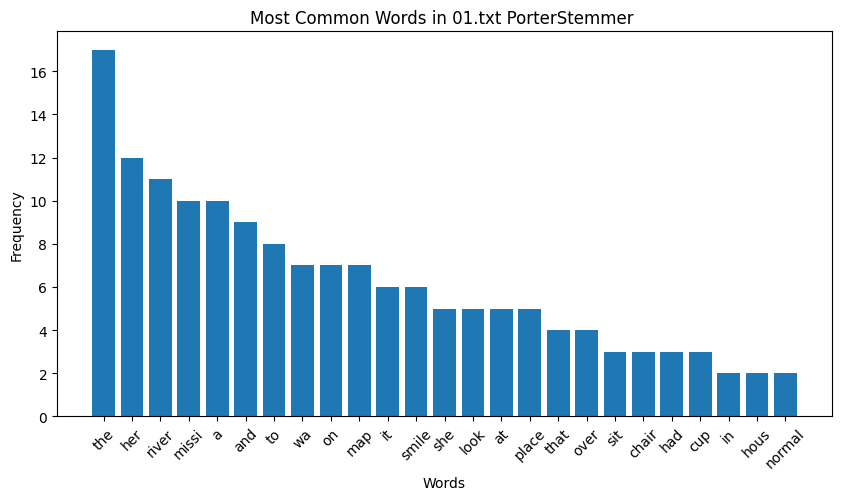

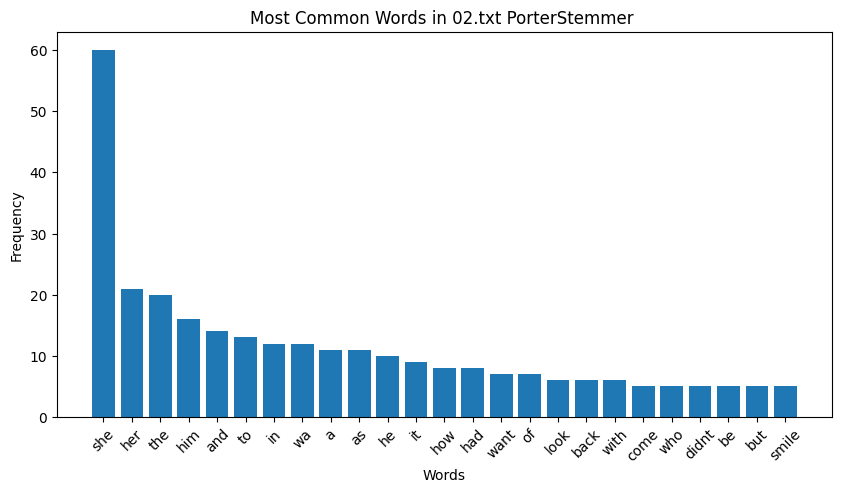

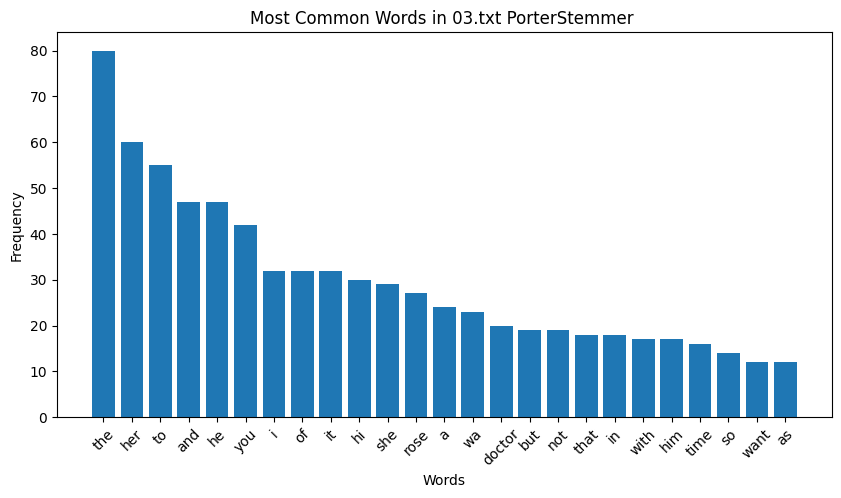

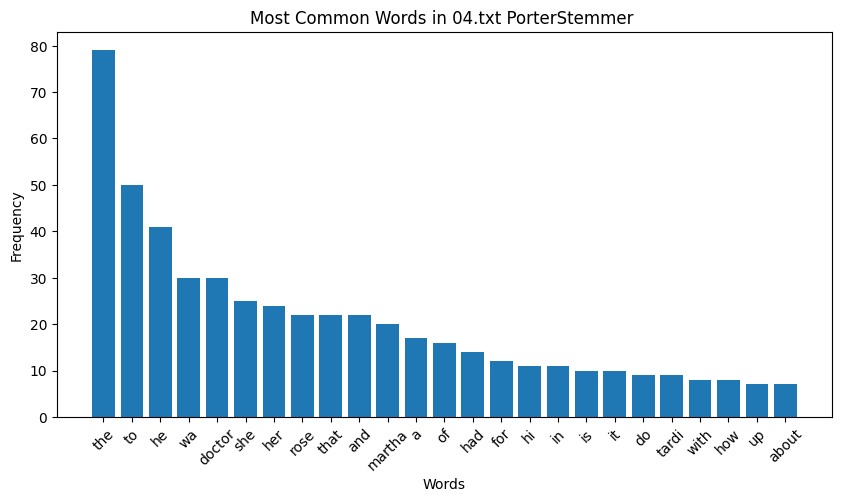

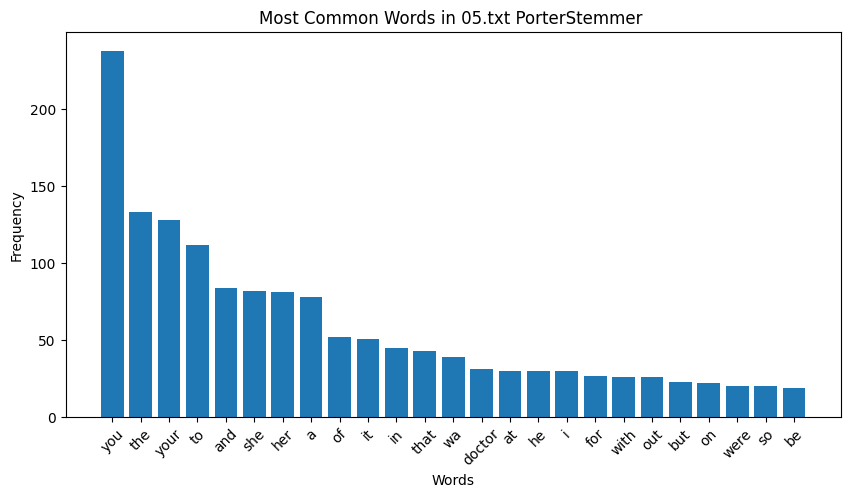

In [338]:
for filename, freq_dist in p_stemmed_word_frequencies_1_2.items():
    plot_word_frequencies(freq_dist, f'Most Common Words in {filename} PorterStemmer ')

### Lancaster Stemmer 

In [135]:
#initialise the stemmer
l_stemmer = LancasterStemmer()

### Tokenize text

In [137]:
l_stemmed_texts_1_2 = {}

for filename, text in texts_1_2.items():
    # tokenize text into words
    words = word_tokenize(text)  
    # stem each word
    l_stemmed_words = [l_stemmer.stem(word) for word in words]
    # storing the stemmed words back in the dictionary
    l_stemmed_texts_1_2[filename] = l_stemmed_words

In [314]:
l_stemmed_texts_1_2

{'01.txt': ['anoth',
  'plot',
  'bonesbard',
  'missy',
  'was',
  'sit',
  'on',
  'a',
  'chair',
  'in',
  'a',
  'hous',
  'map',
  'and',
  'pap',
  'spread',
  'around',
  'norm',
  'her',
  'plan',
  'was',
  'ment',
  'but',
  'riv',
  'had',
  'suggest',
  'a',
  'phys',
  'map',
  'to',
  'ref',
  'to',
  'and',
  'it',
  'was',
  'help',
  'riv',
  'walk',
  'out',
  'of',
  'the',
  'bedroom',
  'the',
  'peopl',
  'who',
  'own',
  'thi',
  'hous',
  'real',
  'hav',
  'no',
  'good',
  'cloth',
  'she',
  'was',
  'wear',
  'a',
  'tshirt',
  'that',
  'drench',
  'her',
  'form',
  'and',
  'som',
  'trous',
  'that',
  'look',
  'about',
  'the',
  'right',
  'siz',
  'missy',
  'smil',
  'stil',
  'in',
  'her',
  'mary',
  'poppin',
  'look',
  'outfit',
  'riv',
  'look',
  'ov',
  'at',
  'the',
  'map',
  'darl',
  'wouldnt',
  'it',
  'be',
  'bet',
  'to',
  'start',
  'ther',
  'she',
  'point',
  'at',
  'a',
  'plac',
  'on',
  'the',
  'map',
  'it',
  'mor'

### Calculate word frequency statistics

In [143]:
l_stemmed_word_frequencies_1_2 = {}
l_stemmed_total_word_frequencies = FreqDist()

for filename, tokens in l_stemmed_texts_1_2.items():
    freq_dist = FreqDist(tokens)
    l_stemmed_word_frequencies_1_2[filename] = freq_dist
    l_stemmed_total_word_frequencies.update(tokens)

Total Stemmed Word Frequencies:
[('the', 329), ('you', 284), ('to', 238), ('her', 201), ('she', 201), ('and', 176), ('a', 140), ('yo', 132), ('he', 125), ('was', 111)]


In [342]:
l_stemmed_word_frequencies_1_2

{'01.txt': FreqDist({'the': 17, 'her': 12, 'riv': 11, 'missy': 10, 'a': 10, 'and': 9, 'to': 8, 'was': 7, 'on': 7, 'map': 7, ...}),
 '02.txt': FreqDist({'she': 60, 'her': 23, 'the': 20, 'him': 16, 'and': 14, 'to': 13, 'in': 12, 'was': 12, 'a': 11, 'as': 11, ...}),
 '03.txt': FreqDist({'the': 80, 'her': 60, 'to': 55, 'and': 47, 'he': 47, 'you': 42, 'i': 32, 'of': 32, 'it': 32, 'his': 30, ...}),
 '04.txt': FreqDist({'the': 79, 'to': 50, 'he': 39, 'was': 30, 'doct': 30, 'she': 25, 'her': 25, 'ros': 22, 'that': 22, 'and': 22, ...}),
 '05.txt': FreqDist({'you': 238, 'the': 133, 'yo': 128, 'to': 112, 'and': 84, 'she': 82, 'her': 81, 'a': 78, 'of': 52, 'it': 51, ...})}

### Plot histogram

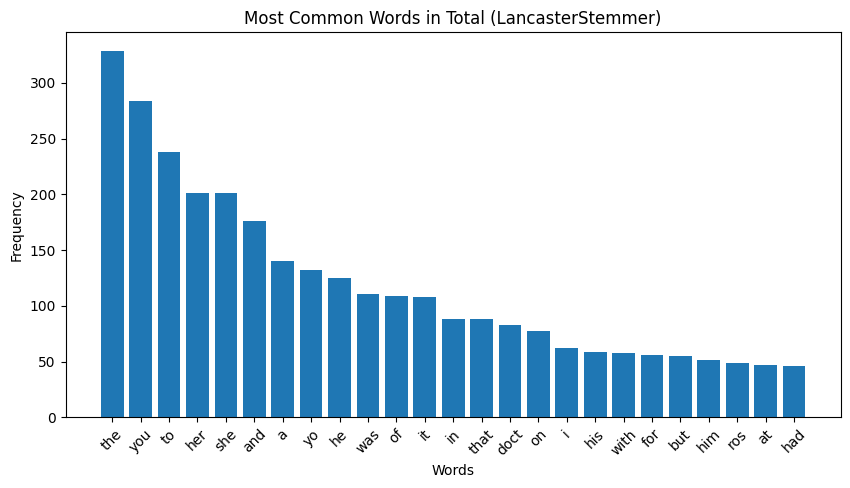

In [226]:
plot_word_frequencies(l_stemmed_total_word_frequencies, 'Most Common Words in Total (LancasterStemmer)')

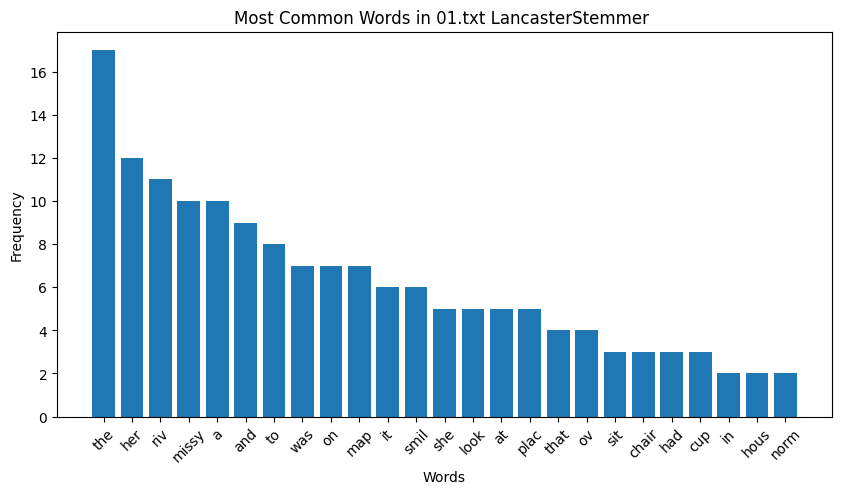

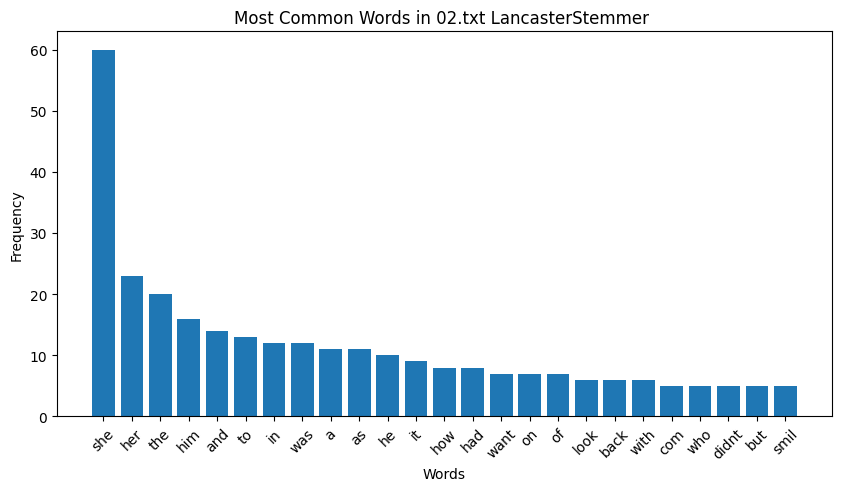

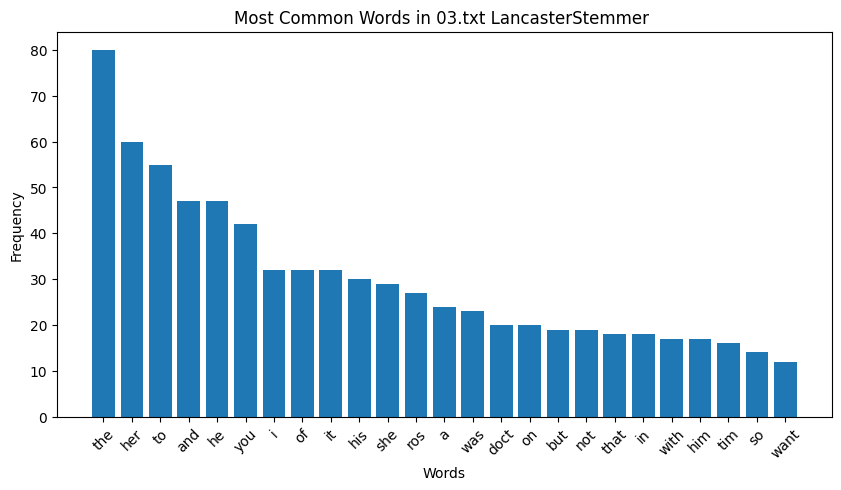

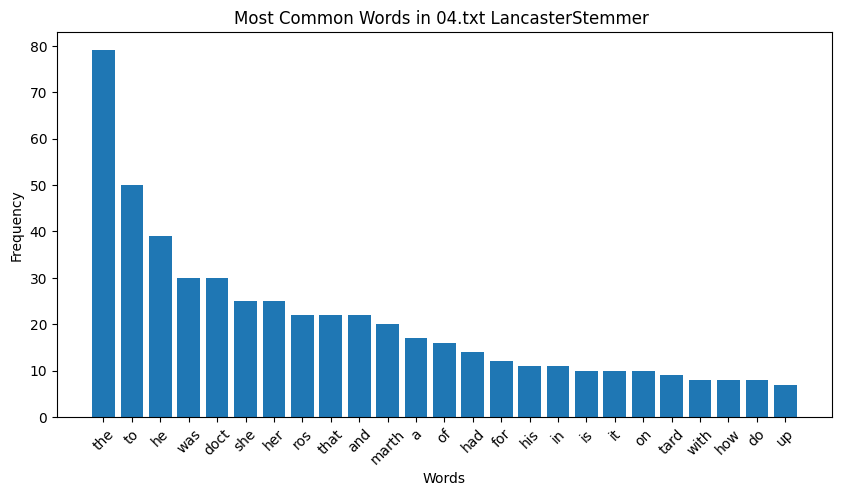

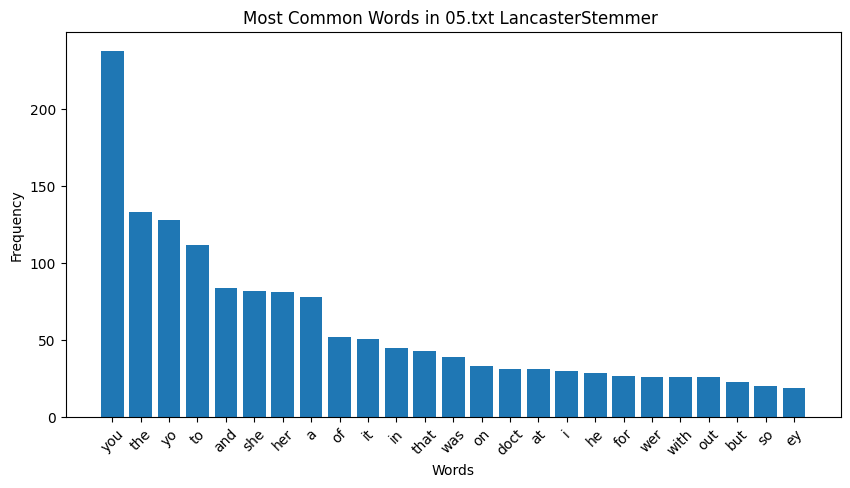

In [340]:
for filename, freq_dist in l_stemmed_word_frequencies_1_2.items():
    plot_word_frequencies(freq_dist, f'Most Common Words in {filename} LancasterStemmer ')

### Part 1, Question 3

In [318]:
import spacy

# load the eng, dutch and german model
nlp_en = spacy.load("en_core_web_sm")
nlp_nl = spacy.load("nl_core_news_sm")
nlp_de = spacy.load("de_core_news_sm")

In [388]:
from collections import Counter

# initialize counters for each language
pos_counts = {
    'en': Counter(),
    'de': Counter(),
    'nl': Counter()
}

# processing each language's text
for filename, text in texts_3.items():
    # label the language to the correct file
    if 'pg74' in filename: 
        doc = nlp_en(text)
        lang = 'en'
    elif 'pg30165' in filename:  
        doc = nlp_de(text)
        lang = 'de'
    elif 'pg18381' in filename:  
        doc = nlp_nl(text)
        lang = 'nl'
    

    # Count POS tags
    for token in doc:
        pos_counts[lang][token.pos_] += 1

# reporting the frequencies of the tags
for lang, counts in pos_counts.items():
    print(f"POS tag frequencies for {lang}:")
    for pos, count in counts.items():
        print(f"{pos}: {count}")
    print("\n")

POS tag frequencies for en:
PUNCT: 15310
PROPN: 3009
SPACE: 6392
DET: 6856
NOUN: 12144
PRON: 10267
AUX: 4377
VERB: 11292
ADP: 7258
X: 73
ADJ: 4404
CCONJ: 3840
ADV: 4883
PART: 2085
SCONJ: 1805
INTJ: 475
NUM: 639
SYM: 1


POS tag frequencies for de:
PUNCT: 18396
PROPN: 2181
SPACE: 6629
DET: 7449
NOUN: 11098
PRON: 8771
ADV: 9266
AUX: 3740
VERB: 9468
SCONJ: 1514
ADJ: 2913
CCONJ: 3356
ADP: 5268
X: 221
PART: 1679
NUM: 309
INTJ: 208


POS tag frequencies for nl:
PUNCT: 13927
PROPN: 3456
SYM: 346
SPACE: 7202
DET: 7105
NOUN: 11905
ADV: 5754
AUX: 3834
ADJ: 5037
VERB: 11757
PRON: 10014
ADP: 8782
CCONJ: 3499
SCONJ: 1998
INTJ: 365
NUM: 386
X: 23




## Part II

On the data for Part I (1+2), perform Named Entity Recognition using spacy. Annotate a small data set of 1-2 sentences per text with named entity categories. (The sentences are supposed to include names of characters, places and other entities.)

How good or bad is the performance of the automatic method on the manually annotated text? Report Precision, Recall, F1 Score and discuss the results. 



In [390]:
import spacy
from sklearn.metrics import precision_score, recall_score, f1_score

# first text
text_01 = [
    "Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps."
]

# manually annotated entities (entity, label)
manual_annotations = [
    ("Missy", "PERSON"),
    ("Mary Poppins", "PERSON"),
    ("River", "PERSON"),
    ("maps", "OBJECT")  
]

# extract entities
predicted_entities = []
for sentence in text_01:
    doc = nlp_en(sentence)
    print(f"Sentence: {sentence}")
    
    for ent in doc.ents:
        predicted_entities.append((ent.text, ent.label_))
        print(f"Predicted Entity: {ent.text}, Label: {ent.label_}")

# convert lists of tuples to sets 
predicted_set = set(predicted_entities)
manual_set = set(manual_annotations)

# calculate tp, fp, and fn
TP = len(predicted_set.intersection(manual_set))
FP = len(predicted_set - manual_set)
FN = len(manual_set - predicted_set)

# calculate precision, recall, F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# print the results
print("\nReport:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Sentence: Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps.
Predicted Entity: Mary Poppins, Label: PERSON
Predicted Entity: River, Label: LOC

Report:
Precision: 0.50
Recall: 0.25
F1 Score: 0.33


In [392]:
# secnd text
text_02 = [
    "She wished it could have been him after he knew who she was, because what he was mostly talking about was 1969. She wanted to know how her parents were in New York."
]

# manually annotated entities (entity, label)
manual_annotations = [
    ("1969", "DATE"),
    ("New York", "GPE")  
]

# extract entities
predicted_entities = []
for sentence in text_02:
    doc = nlp_en(sentence)
    print(f"Sentence: {sentence}")
    
    for ent in doc.ents:
        predicted_entities.append((ent.text, ent.label_))
        print(f"Predicted Entity: {ent.text}, Label: {ent.label_}")

# convert lists of tuples to sets 
predicted_set = set(predicted_entities)
manual_set = set(manual_annotations)

# calculate tp, fp, and fn
TP = len(predicted_set.intersection(manual_set))
FP = len(predicted_set - manual_set)
FN = len(manual_set - predicted_set)

# calculate precision, recall, F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# print the results
print("\nReport:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Sentence: She wished it could have been him after he knew who she was, because what he was mostly talking about was 1969. She wanted to know how her parents were in New York.
Predicted Entity: 1969, Label: DATE
Predicted Entity: New York, Label: GPE

Report:
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [394]:
# third text
text_03 = [
    """Rose Tyler. Rassilon, how he loved to say her name.
    I was going to take you to so many places. Barcelona. Not the city Barcelona, the planet Barcelona."""
]

# Manually annotated entities (entity, label)
manual_annotations = [
    ("Rose Tyler", "PER"),
    ("Rassilon", "PER"),
    ("Barcelona", "GPE"),
    ("Barcelona", "GPE")
]
# extract entities
predicted_entities = []
for sentence in text_03:
    doc = nlp_en(sentence)
    print(f"Sentence: {sentence}")
    
    for ent in doc.ents:
        predicted_entities.append((ent.text, ent.label_))
        print(f"Predicted Entity: {ent.text}, Label: {ent.label_}")

# convert lists of tuples to sets 
predicted_set = set(predicted_entities)
manual_set = set(manual_annotations)

# calculate tp, fp, and fn
TP = len(predicted_set.intersection(manual_set))
FP = len(predicted_set - manual_set)
FN = len(manual_set - predicted_set)

# calculate precision, recall, F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# print the results
print("\nReport:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Sentence: Rose Tyler. Rassilon, how he loved to say her name.
    I was going to take you to so many places. Barcelona. Not the city Barcelona, the planet Barcelona.
Predicted Entity: Rose Tyler, Label: PERSON
Predicted Entity: Barcelona, Label: GPE
Predicted Entity: Barcelona, Label: GPE
Predicted Entity: Barcelona, Label: GPE

Report:
Precision: 0.50
Recall: 0.33
F1 Score: 0.40


In [396]:
# fourth text
text_04 = [
    """The TARDIS wasn’t meant to translate Gallifreyan to other languages. 
    So, very early on, The Doctor had adjusted some things so she could translate Gallifreyan to English. 
    The system had to be repaired regularly, but it was worth it for people like Rose. 
"""
]

# manually annotated entities (entity, label)
manual_annotations = [
    ("TARDIS", "ORG"),
    ("Gallifreyan", "LANGUAGE"),
    ("Gallifreyan", "LANGUAGE"),
    ("English", "LANG"),
    ("Rose", "PERSON")
]
# extract entities
predicted_entities = []
for sentence in text_04:
    doc = nlp_en(sentence)
    print(f"Sentence: {sentence}")
    
    for ent in doc.ents:
        predicted_entities.append((ent.text, ent.label_))
        print(f"Predicted Entity: {ent.text}, Label: {ent.label_}")

# convert lists of tuples to sets 
predicted_set = set(predicted_entities)
manual_set = set(manual_annotations)

# calculate tp, fp, and fn
TP = len(predicted_set.intersection(manual_set))
FP = len(predicted_set - manual_set)
FN = len(manual_set - predicted_set)

# calculate precision, recall, F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# print the results
print("\nReport:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Sentence: The TARDIS wasn’t meant to translate Gallifreyan to other languages. 
    So, very early on, The Doctor had adjusted some things so she could translate Gallifreyan to English. 
    The system had to be repaired regularly, but it was worth it for people like Rose. 

Predicted Entity: TARDIS, Label: ORG
Predicted Entity: Gallifreyan, Label: PERSON
Predicted Entity: Gallifreyan, Label: PRODUCT
Predicted Entity: English, Label: LANGUAGE
Predicted Entity: Rose, Label: PERSON

Report:
Precision: 0.40
Recall: 0.50
F1 Score: 0.44


In [398]:
# fifth text
text_05 = [
    """They were called Torwash or Torvash, you weren’t sure. 
    You may or may not have set off a couple of explosives to blow up their building on planet Serentara, 
    ruining their plans to enslave its population. 
"""
]

# manually annotated entities (entity, label)
manual_annotations = [
    ("Torwash", "NORP"),
    ("Torvash", "NORP"),
    ("Serentara", "GPE"),
]
# extract entities
predicted_entities = []
for sentence in text_05:
    doc = nlp_en(sentence)
    print(f"Sentence: {sentence}")
    
    for ent in doc.ents:
        predicted_entities.append((ent.text, ent.label_))
        print(f"Predicted Entity: {ent.text}, Label: {ent.label_}")

# convert lists of tuples to sets 
predicted_set = set(predicted_entities)
manual_set = set(manual_annotations)

# calculate tp, fp, and fn
TP = len(predicted_set.intersection(manual_set))
FP = len(predicted_set - manual_set)
FN = len(manual_set - predicted_set)

# calculate precision, recall, F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# print the results
print("\nReport:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Sentence: They were called Torwash or Torvash, you weren’t sure. 
    You may or may not have set off a couple of explosives to blow up their building on planet Serentara, 
    ruining their plans to enslave its population. 

Predicted Entity: Torwash or Torvash, Label: WORK_OF_ART
Predicted Entity: Serentara, Label: PERSON

Report:
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
